# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [36]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


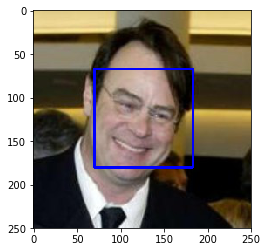

In [37]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [38]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [12]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_in_humans = []
human_in_dogs = []
for i, j in tqdm(zip(human_files_short, dog_files_short)):
    human_in_humans.append(face_detector(i))
    human_in_dogs.append(face_detector(j))

print('{}% humans in human images'.format(int(round(100*sum(human_in_humans)/len(human_in_humans),2))))
print('{}% humans in dog images'.format(int(round(100*sum(human_in_dogs)/len(human_in_dogs),2))))


100it [01:31,  2.94it/s]

98% humans in human images
17% humans in dog images


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [39]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [40]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.ToTensor()])
    im = Image.open(img_path)
    trans_im = data_transform(im)
    new_shape = [1] + list(trans_im.shape)
    trans_im = trans_im.view(new_shape)
    output = VGG16(trans_im)
    image_class = output.argmax(1).item()
    
    return  image_class# predicted class index

VGG16_predict('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [41]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    is_dog = (VGG16_predict(img_path) >= 151 and VGG16_predict(img_path) <= 268)
    return is_dog # true/false

dog_detector('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

humans = 0
dogs = 0
for i, j in tqdm(zip(human_files_short, dog_files_short)):
    if dog_detector(i):
        humans += 1
    if dog_detector(j):
        dogs += 1
        
print('{}% dogs in human images'.format(int(round(100*humans/len(human_files_short),2))))
print('{}% dogs in dog images'.format(int(round(100*dogs/len(human_files_short),2))))


100it [06:19,  3.89s/it]

1% dogs in human images
80% dogs in dog images


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

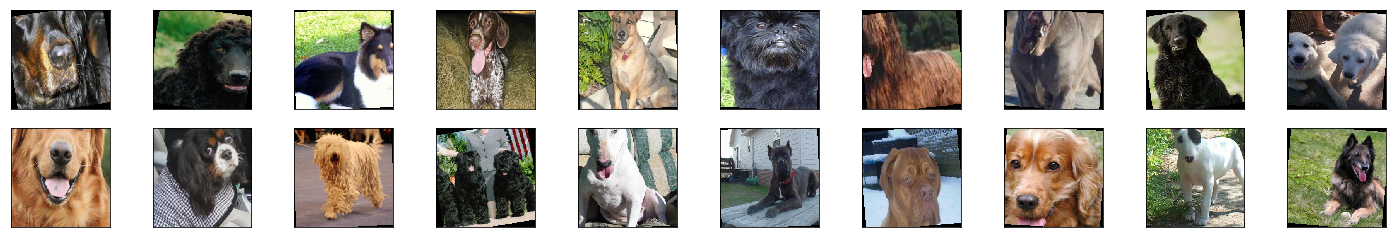

In [15]:
import os
from torchvision import datasets
from PIL import ImageFile
import torchvision.transforms as transforms
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

data_transform = transforms.Compose([transforms.RandomResizedCrop(256),
                                    transforms.RandomRotation(10),
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

batch_size = 20
num_workers= 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

dataiter = iter(valid_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    #print(images[idx].shape)
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: My code crops images to a size of 256\*256 pixels. Since the cropping process is randomized, it is a kind of augmentation by itself. Also, I viewed a lot of the images and it seemed that a  translation and horizontal flip wouldn't help much as the dog features happen anywhere in the images as they are and their faces are almost horizontally symmetrical. However, dog faces in most of them had a vertical orientation, so I thought rotation may add some good variety.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 16 * 16, 2000)
        self.fc2 = nn.Linear(2000, 500)
        self.fc3 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

def weights_init_normal(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

model_scratch.apply(weights_init_normal)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ <br>
1 - I initially tried a 3 convolutioanl layers and 2 fully-connected linear layers with dropout in between to implement regularization and I trained the model:<br>
    The loss even in training was pretty high.<br>

2 - So in the next try I used 4 convolutional layers:<br>
    I saw that I got considerably lower loss, but when I tested it, the loss was really higher.<br>

3 - So I figured I need more regularization, so I added 1 more fully connected linear layers, with dropout:<br>
    Now after I trained the model and tested it I obtained 10.8% success in test.S   

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim
import torch.nn as nn

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer_scratch.zero_grad()
            output = model_scratch(data)
        
            loss = criterion_scratch(output, target)
        
            loss.backward()
        
            optimizer_scratch.step()
        
            #train_loss += loss.item()*data.size(0)
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model_scratch(data)
            loss = criterion_scratch(output, target)
            valid_loss += loss.item()*data.size(0)
    
        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model_scratch.state_dict(), 'model_scratch.pt')
            
    # return trained model
    return model


# train the model
model_scratch = train(80, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000732 	Validation Loss: 4.881739
Epoch: 2 	Training Loss: 0.000730 	Validation Loss: 4.872938
Epoch: 3 	Training Loss: 0.000730 	Validation Loss: 4.866699
Epoch: 4 	Training Loss: 0.000729 	Validation Loss: 4.862112
Epoch: 5 	Training Loss: 0.000729 	Validation Loss: 4.861608
Epoch: 6 	Training Loss: 0.000727 	Validation Loss: 4.853651
Epoch: 7 	Training Loss: 0.000726 	Validation Loss: 4.841018
Epoch: 8 	Training Loss: 0.000723 	Validation Loss: 4.809890
Epoch: 9 	Training Loss: 0.000719 	Validation Loss: 4.794826
Epoch: 10 	Training Loss: 0.000715 	Validation Loss: 4.762812
Epoch: 11 	Training Loss: 0.000712 	Validation Loss: 4.758697
Epoch: 12 	Training Loss: 0.000709 	Validation Loss: 4.737600
Epoch: 13 	Training Loss: 0.000707 	Validation Loss: 4.716213
Epoch: 14 	Training Loss: 0.000706 	Validation Loss: 4.730260
Epoch: 15 	Training Loss: 0.000701 	Validation Loss: 4.734304
Epoch: 16 	Training Loss: 0.000698 	Validation Loss: 4.669555
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.960508


Test Accuracy: 10% (91/836)


Please note that 91/836 is actually 10.88\% so the performance is in fact higher than 10%.

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [14]:
## TODO: Specify data loaders
import os
import torch
from torchvision import datasets
from PIL import ImageFile
import torchvision.transforms as transforms
ImageFile.LOAD_TRUNCATED_IMAGES = True

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomRotation(20),
                                    transforms.RandomHorizontalFlip(p=0.2),
                                    transforms.RandomVerticalFlip(p=0.1),
                                    transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

batch_size = 20
num_workers= 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

dataiter = iter(valid_loader)
images, labels = dataiter.next()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [5]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture
model_transfer = models.vgg16(pretrained=True)
for param in model_transfer.features.parameters():
    param.requires_grad = False

n = model_transfer.classifier[6].in_features
last_layer = nn.Sequential(nn.Linear(n, 500),
                         nn.ReLU(True),
                         nn.BatchNorm1d(500),
                         nn.Dropout(0.5),
                         nn.Linear(500, 400),
                         nn.ReLU(True),
                         nn.BatchNorm1d(400),
                         nn.Dropout(0.5),
                         nn.Linear(400, 133))

model_transfer.classifier[6] = last_layer

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

#print(model_transfer)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ <br>
First of all I decided to use vgg16 as the basis for my transfer learning since I was already familiar with it. So in the next steps I tried to replace the last classification layer with my own design to give it enough flexibility to train for dog breeds. I was also aware that I can improve generilizablity of the network by training data augmentation.<br>

1 - I used only random crop and a random rotation of 10 degrees for augmentation and in the design of the classification super-layer I used 2 linear layers with dropout and batch normalization:<br>
    I obtained pretty low loss for validation during training/validation phase but the performance in testing never got above 42%.<br>
    
2 - I added another linear layer to the classification super-layer (with dropout) and saw that I got even less loss during training/validation, but there was little improvement in testing, so I decided to provide more augmentation to improve generalizability.<br>

3 - So I provided more augmentation by increasing the rotation to 20 degrees and adding random horizontal and vertical flip, and trained the model. The model had to be trained for more epochs to get to low enough validation loss, but then when I tried it on the test set, I got 62% success.<br>

During the training/validation phase I kept an eye on the loss values and intrupted the calculation when I realized that the validation loss has plateaued to prevent overfit and also burning out my GPU time. So this is why you see "KeyboardInterrupt:" below.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [6]:
import torch.nn as nn
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [7]:
import numpy as np

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer_transfer.zero_grad()
            output = model_transfer(data)
        
            loss = criterion_transfer(output, target)
        
            loss.backward()
        
            optimizer_transfer.step()
        
            #train_loss += loss.item()*data.size(0)
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model_transfer(data)
            loss = criterion_transfer(output, target)
            valid_loss += loss.item()*data.size(0)
    
        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model_transfer.state_dict(), 'model_transfer.pt')
            
    # return trained model
    return model


# train the model
model_transfer = train(100, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000676 	Validation Loss: 3.885961
Epoch: 2 	Training Loss: 0.000562 	Validation Loss: 3.209948
Epoch: 3 	Training Loss: 0.000482 	Validation Loss: 2.806426
Epoch: 4 	Training Loss: 0.000434 	Validation Loss: 2.439855
Epoch: 5 	Training Loss: 0.000398 	Validation Loss: 2.253884
Epoch: 6 	Training Loss: 0.000367 	Validation Loss: 2.062056
Epoch: 7 	Training Loss: 0.000345 	Validation Loss: 1.867210
Epoch: 8 	Training Loss: 0.000330 	Validation Loss: 1.875531
Epoch: 9 	Training Loss: 0.000315 	Validation Loss: 1.776500
Epoch: 10 	Training Loss: 0.000308 	Validation Loss: 1.593817
Epoch: 11 	Training Loss: 0.000296 	Validation Loss: 1.655830
Epoch: 12 	Training Loss: 0.000289 	Validation Loss: 1.668960
Epoch: 13 	Training Loss: 0.000280 	Validation Loss: 1.553798
Epoch: 14 	Training Loss: 0.000278 	Validation Loss: 1.542752
Epoch: 15 	Training Loss: 0.000270 	Validation Loss: 1.549035
Epoch: 16 	Training Loss: 0.000266 	Validation Loss: 1.473328
Epoch: 17 	Traini

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [8]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    if use_cuda:
        model.cuda()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

use_cuda = torch.cuda.is_available()

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.375949


Test Accuracy: 62% (520/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [42]:
import torch.nn as nn
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
#optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01)
import torch

model_transfer_dict = torch.load('model_transfer.pt', map_location='cpu')
print(model_transfer_dict.keys())

import torchvision.models as models
import torch.nn as nn

model_transfer_reloaded = models.vgg16(pretrained=True)
for param in model_transfer_reloaded.features.parameters():
    param.requires_grad = False
for param in model_transfer_reloaded.classifier.parameters():
    param.requires_grad = False
    
n = model_transfer_reloaded.classifier[6].in_features
last_layer = nn.Sequential(nn.Linear(n, 500),
                         nn.ReLU(True),
                         nn.BatchNorm1d(500),
                         nn.Dropout(0.5),
                         nn.Linear(500, 400),
                         nn.ReLU(True),
                         nn.BatchNorm1d(400),
                         nn.Dropout(0.5),
                         nn.Linear(400, 133))

model_transfer_reloaded.classifier[6] = last_layer

#print(model_transfer_reloaded)

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.0.weight', 'classifier.6.0.bias', 'classifier.6.2.weight', 'classifier.6.2.bias', 'classifier.6.2.running_mean', 'classifier.6.2.running_var', 'classifier.6.4.weight', 'classifier.6.4.bias', 'classifier.6.6.weight', 'classifier.6.6.bias', 'classifier.6.6.running_mean', 'classifier.6.6.running_var', 'classifier.6.8.weight', 'classifier.6.8.bias'])

In [43]:
model_transfer_reloaded.classifier[0].weight = torch.nn.Parameter(model_transfer_dict['classifier.0.weight'])
model_transfer_reloaded.classifier[0].bias = torch.nn.Parameter(model_transfer_dict['classifier.0.bias'])
model_transfer_reloaded.classifier[3].weight = torch.nn.Parameter(model_transfer_dict['classifier.3.weight'])
model_transfer_reloaded.classifier[3].bias = torch.nn.Parameter(model_transfer_dict['classifier.3.bias'])
model_transfer_reloaded.classifier[6][0].weight = torch.nn.Parameter(model_transfer_dict['classifier.6.0.weight'])
model_transfer_reloaded.classifier[6][0].bias = torch.nn.Parameter(model_transfer_dict['classifier.6.0.bias'])
model_transfer_reloaded.classifier[6][2].weight = torch.nn.Parameter(model_transfer_dict['classifier.6.2.weight'])
model_transfer_reloaded.classifier[6][2].bias = torch.nn.Parameter(model_transfer_dict['classifier.6.2.bias'])
model_transfer_reloaded.classifier[6][2].running_mean = torch.nn.Parameter(model_transfer_dict['classifier.6.2.running_mean'])
model_transfer_reloaded.classifier[6][2].running_var = torch.nn.Parameter(model_transfer_dict['classifier.6.2.running_var'])
model_transfer_reloaded.classifier[6][4].weight = torch.nn.Parameter(model_transfer_dict['classifier.6.4.weight'])
model_transfer_reloaded.classifier[6][4].bias = torch.nn.Parameter(model_transfer_dict['classifier.6.4.bias'])
model_transfer_reloaded.classifier[6][6].weight = torch.nn.Parameter(model_transfer_dict['classifier.6.6.weight'])
model_transfer_reloaded.classifier[6][6].bias = torch.nn.Parameter(model_transfer_dict['classifier.6.6.bias'])
model_transfer_reloaded.classifier[6][6].running_mean = torch.nn.Parameter(model_transfer_dict['classifier.6.6.running_mean'])
model_transfer_reloaded.classifier[6][6].running_var = torch.nn.Parameter(model_transfer_dict['classifier.6.6.running_var'])
model_transfer_reloaded.classifier[6][8].weight = torch.nn.Parameter(model_transfer_dict['classifier.6.8.weight'])
model_transfer_reloaded.classifier[6][8].bias = torch.nn.Parameter(model_transfer_dict['classifier.6.8.bias'])

In [45]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import ImageFile
from PIL import Image
import torchvision.transforms as transforms
import os
from torchvision import datasets
ImageFile.LOAD_TRUNCATED_IMAGES = True

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)


data_transfer = {'train': train_data, 'valid': valid_data, 'test': test_data}


# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


model_transfer_reloaded.eval()
for param in model_transfer_reloaded.features.parameters():
    param.requires_grad = False
for param in model_transfer_reloaded.classifier.parameters():
    param.requires_grad = False

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    im = Image.open(img_path)
    trans_im = data_transform(im)
    new_shape = [1] + list(trans_im.shape)
    trans_im = trans_im.view(new_shape)
    output = model_transfer_reloaded(trans_im)
    image_class = class_names[output.argmax(1).item()]    
    
    return image_class

predict_breed_transfer('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')

'Affenpinscher'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

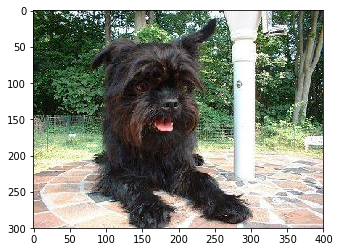


I bet that's one of our canine friends! And if you ask for my expert opinion, I say we have a Affenpinscher here.


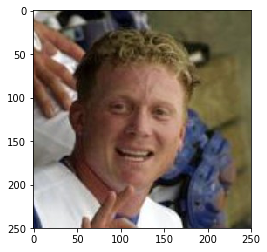

I reckon I see a bloke or a lady who peculiarly resembles American staffordshire terrier dogs.


In [54]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    #img = cv2.imread(img_path)
    #if img == None: 
        #raise Exception("could not load image !")
    if face_detector(img_path):
        img = cv2.imread(img_path)
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(cv_rgb)
        plt.show()
        return print("I reckon I see a bloke or a lady who peculiarly resembles", predict_breed_transfer(img_path), 'dogs.')
    elif dog_detector(img_path):
        img = cv2.imread(img_path)
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(cv_rgb)
        plt.show()
        print("")
        return print("I bet that's one of our canine friends! And if you ask for my expert opinion, I say we have a", predict_breed_transfer(img_path), 'here.')
    else:
        img = cv2.imread(img_path)
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(cv_rgb)
        plt.show()
        return print("I'm disappointed (i.e. ERROR!). Was Hoping to see a friend, human or otherwise")
        
run_app('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')
run_app('/data/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
In the test bellow, I got 5 correct recognitions out of 6. I am particullarly impressed by the fact that the dog breeds (Australian and German shepherd dogs are correctly identified and also the cat was not recognized as a dog, but I find it pretty funny/disappointing that a tea pot was identified as a human. I suppose the handle and the nozzle were particularly like human ears!

1 - Improving the performance of the model_transfer by improving the architecture.<br>
2 - Improving the human-dog-breed association by providing human images that are labelled with proper dog-breed labels during the training of the model_transfer.<br>
3 - Improving the training of model_transfer by providing images of other animals (cats, deers, etc.) labelled as non-dog (as a 134th class) to help the network distinguish dogs from non-dogs.

In [32]:
pwd

'/home/workspace/dog_project'

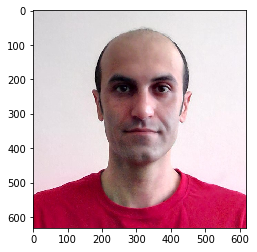

I reckon I see a bloke or a lady who peculiarly resembles Pharaoh hound dogs.


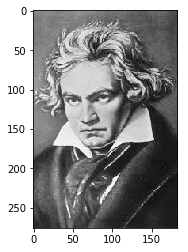

I reckon I see a bloke or a lady who peculiarly resembles Alaskan malamute dogs.


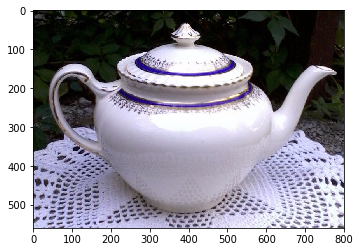

I reckon I see a bloke or a lady who peculiarly resembles Bull terrier dogs.


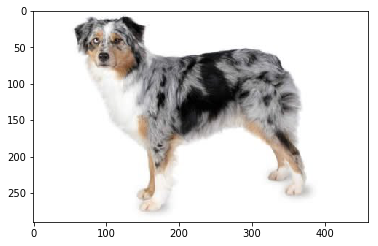


I bet that's one of our canine friends! And if you ask for my expert opinion, I say we have a Australian shepherd here.


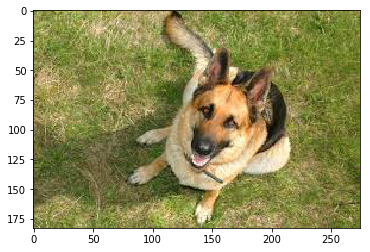


I bet that's one of our canine friends! And if you ask for my expert opinion, I say we have a German shepherd dog here.


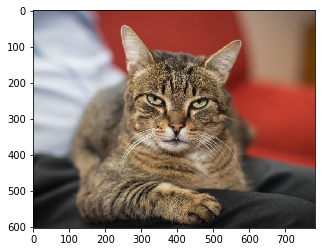

I'm disappointed (i.e. ERROR!). Was Hoping to see a friend, human or otherwise


In [55]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

run_app("/home/workspace/dog_project/my_sample_images/payam.jpg")
run_app("/home/workspace/dog_project/my_sample_images/beethoven.jpg")
run_app("/home/workspace/dog_project/my_sample_images/pot.JPG")
run_app("/home/workspace/dog_project/my_sample_images/australian-shepherd.jpg")
run_app("/home/workspace/dog_project/my_sample_images/german.jpg")
run_app("/home/workspace/dog_project/my_sample_images/cat.jpg")

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
    #run_app(file)